# Houses in Chennai

We help predict the house prices in Chennai by analysing the market trends and previous sales, so that you would be able find the perfect home without overpaying.

Importing the required packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score
import xgboost as xgb
from xgboost import XGBRegressor

In [3]:
df=pd.read_csv('/content/train-chennai-sale.csv')

###Getting a first look at the data

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [5]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [6]:
df.nunique()

PRT_ID           7109
AREA               17
INT_SQFT         1699
DATE_SALE        2798
DIST_MAINROAD     201
N_BEDROOM           4
N_BATHROOM          2
N_ROOM              5
SALE_COND           9
PARK_FACIL          3
DATE_BUILD       5808
BUILDTYPE           5
UTILITY_AVAIL       5
STREET              5
MZZONE              6
QS_ROOMS           31
QS_BATHROOM        31
QS_BEDROOM         31
QS_OVERALL        479
REG_FEE          7038
COMMIS           7011
SALES_PRICE      7057
dtype: int64

###Cleaning the data
1. Looking for missing values


In [7]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

### Handling the missing values


In [8]:
df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0],inplace=True)

df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0],inplace=True)
df['QS_OVERALL'].fillna(df['QS_OVERALL'].median(),inplace=True)


###dropping duplicates


In [9]:
df=df.drop_duplicates()

In [10]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

##Checking the datatypes.

###Changing the dates to 'date' format.


In [11]:
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD']) 
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'])


In [12]:
df[['DATE_SALE','DATE_BUILD']]

,DATE_SALE,DATE_BUILD
0,2011-04-05,1967-05-15
1,2006-12-19,1995-12-22
2,2012-04-02,1992-09-02
3,2010-03-13,1988-03-18
4,2009-05-10,1979-10-13
...,...,...
7104,2011-03-01,1962-01-15
7105,2004-08-04,1995-11-04
7106,2006-08-25,1978-01-09
7107,2009-03-08,1977-11-08


###Checking for spelling errors.

In [13]:

df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   float64       
 6   N_BATHROOM     7109 non-null   float64       
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

PRT_ID           7109
AREA               17
INT_SQFT         1699
DATE_SALE        2798
DIST_MAINROAD     201
N_BEDROOM           4
N_BATHROOM          2
N_ROOM              5
SALE_COND           9
PARK_FACIL          3
DATE_BUILD       5808
BUILDTYPE           5
UTILITY_AVAIL       5
STREET              5
MZZONE              6
QS_ROOMS           31
QS_BATHROOM        31
QS_BEDROOM         31
QS_OVERALL        479
REG_FEE          7038
COMMIS           7011
SALES_PRICE      7057
dtype: int64

In [14]:

df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [15]:
df['AREA'].replace({'Karapakam' : 'Karapakkam',
                    'Ana Nagar' : 'Anna Nagar',
                    'Ann Nagar' : 'Anna Nagar',
                    'Adyr' : 'Adyar',
                    'TNagar' : 'T Nagar',
                    'Chrmpet': 'Chrompet',
                    'Chrompt' : 'Chrompet',
                    'Chormpet' : 'Chrompet',
                    'Velchery' : 'Velachery',
                    'KKNagar' : 'KK Nagar'},inplace=True)
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [16]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [17]:
df['SALE_COND'].replace({'Ab Normal' : 'Abnormal',
                         'PartiaLl' : 'Partial',
                         'Partiall' : 'Partial',
                         'partial' : 'Partial',
                         'Adj Land' : 'AdjLand',
                         'AbNormal' : 'Abnormal',}, inplace = True)
df['SALE_COND'].unique()

array(['Abnormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [18]:

df['PARK_FACIL'].replace({'Noo': 'No'},inplace=True)
df['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

In [19]:

df['BUILDTYPE'].replace({'Comercial': 'Commercial',
                         'Others' : 'Other'},inplace=True)
df['BUILDTYPE'].unique()

array(['Commercial', 'Other', 'House'], dtype=object)

In [20]:

df['UTILITY_AVAIL'].replace({'All Pub': 'AllPub',
                             'NoSeWa' : 'NoSewr',
                             'NoSewr ' : 'NoSewr'},inplace=True)
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr'], dtype=object)

In [21]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [22]:

df['STREET'].replace({'Pavd': 'Paved',
                      'NoAccess' : 'No Access'},inplace=True)
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

###Changing the rooms datatype from float to int.

In [23]:

df.QS_ROOMS=df.QS_ROOMS.astype(int)
df.QS_BATHROOM=df.QS_BATHROOM.astype(int)
df.QS_BEDROOM=df.QS_BEDROOM.astype(int)
df.N_BEDROOM=df.N_BEDROOM.astype(int)
df.N_BATHROOM=df.N_BATHROOM.astype(int)

###Creating the age column.


In [24]:
df['AGE'] = pd.DatetimeIndex(df.DATE_SALE).year - pd.DatetimeIndex(df.DATE_BUILD).year

##EDA

In [25]:
 df.columns
 

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'AGE'],
      dtype='object')

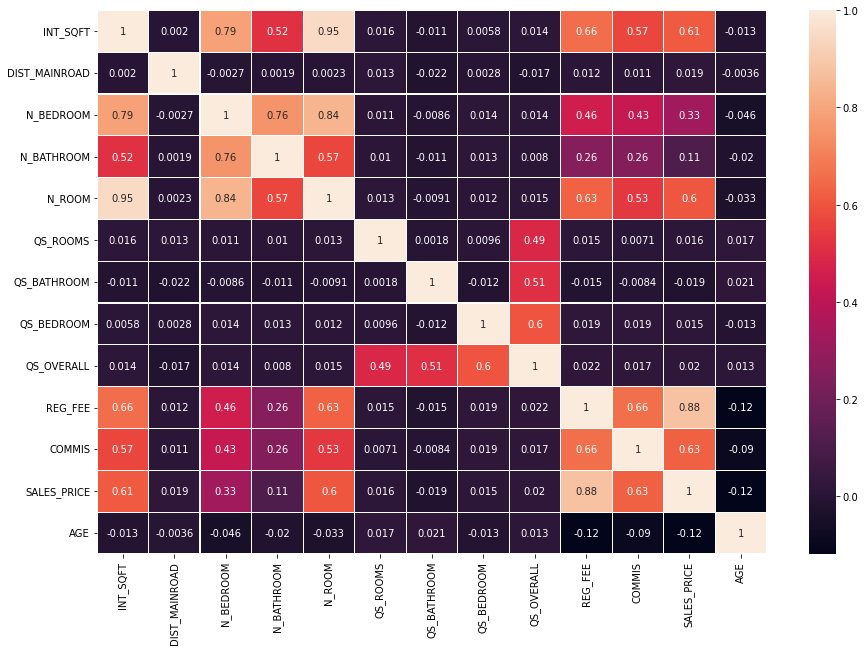

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.2)

In [27]:
area_order = df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']

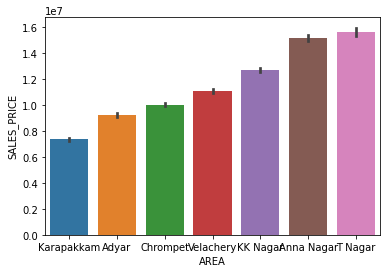

In [28]:
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order=area_order)


We need to encode Karapakkam as 0 and the rest as follows in the ascending order since there is an ordinal relationship between the elements

In [29]:
df.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

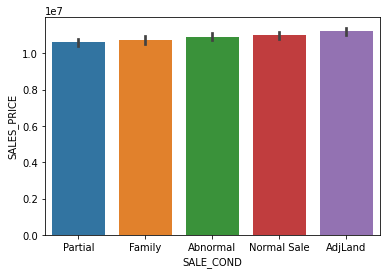

In [30]:
sales_cond_order = df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND']
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=df,order=sales_cond_order )

### Sales condition doesnt effect the sales price.Hence the feature can be dropped

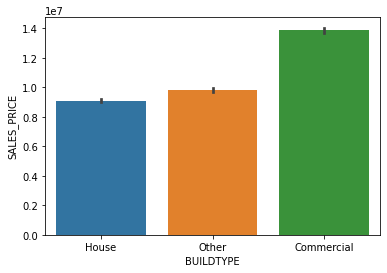

In [31]:
BUILDTYPE_order = df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE']
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,order=BUILDTYPE_order )

In [32]:
# ONE HOT encoding 

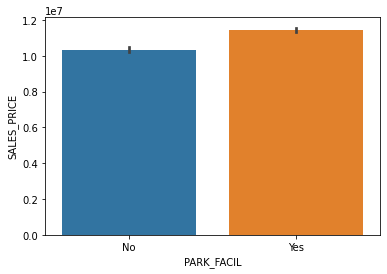

In [33]:
park_facil_order = df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL']
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df,order=park_facil_order )

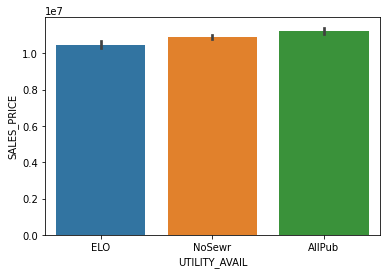

In [34]:
utility_available_order = df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL']
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order=utility_available_order )

### There is a linear relationship between the feature[UTILITY_AVAIL] and the target variable. Hence it is an important feature

In [35]:
filter = df.dtypes[df.dtypes==np.object]
filter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


PRT_ID           object
AREA             object
SALE_COND        object
PARK_FACIL       object
BUILDTYPE        object
UTILITY_AVAIL    object
STREET           object
MZZONE           object
dtype: object

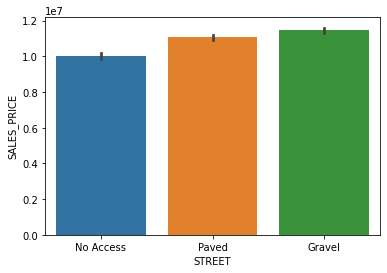

In [36]:
STREET_order = df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET']
sns.barplot(x='STREET',y='SALES_PRICE',data=df,order=STREET_order )

### There is a slight linear relationship between the feature and the target variable


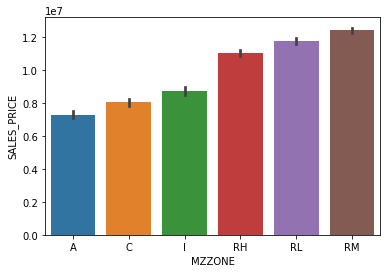

In [37]:
MZZONE_order = df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE']
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df,order=MZZONE_order )

### Here A,Cand I are following a linear relationship while RH,RLand RM are following a linear relationship.
###  There is a jump between I and RH.
###  It is a piecewise linear relationship.


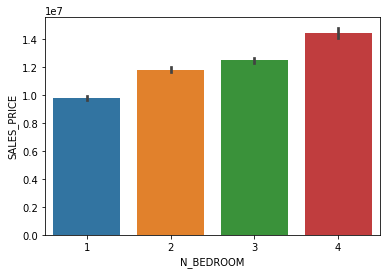

In [38]:
sns.barplot(x='N_BEDROOM', y='SALES_PRICE',data=df)

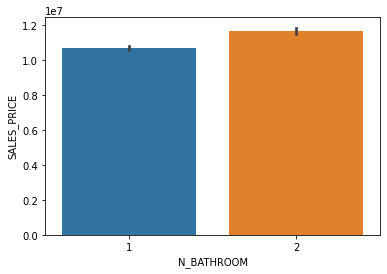

In [39]:
sns.barplot(x='N_BATHROOM', y='SALES_PRICE',data=df)

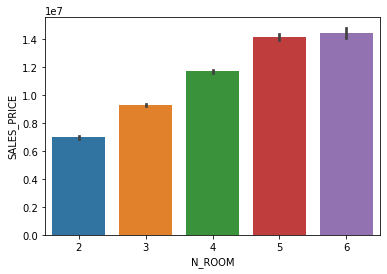

In [40]:
sns.barplot(x='N_ROOM', y='SALES_PRICE',data=df)

### A linear relationship exists between the feature, and the target variable.Hence, it is an important feature.

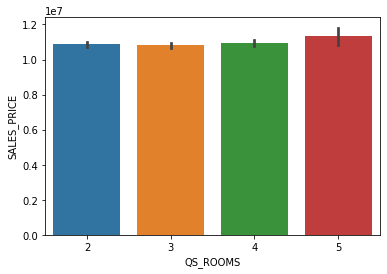

In [41]:
sns.barplot(x='QS_ROOMS', y='SALES_PRICE',data=df)

###The feature doesnot affect the sales price.

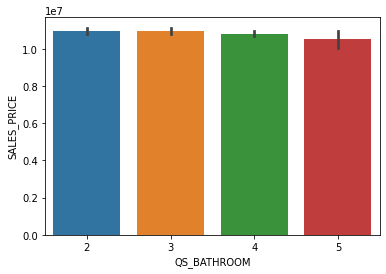

In [42]:
sns.barplot(x='QS_BATHROOM', y='SALES_PRICE',data=df)

###The feature doesnot affect the sales price.

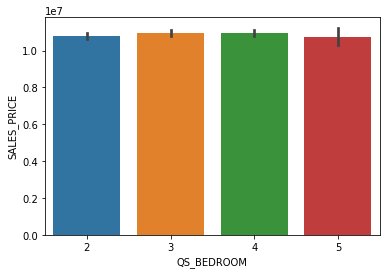

In [43]:

sns.barplot(x='QS_BEDROOM', y='SALES_PRICE',data=df)

###The feature doesnot affect the sales price.

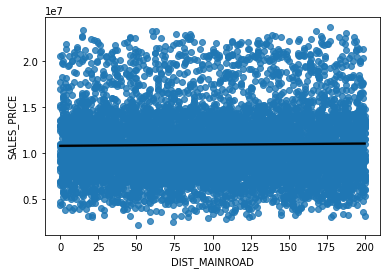

In [44]:
sns.regplot(x='DIST_MAINROAD', y='SALES_PRICE',data=df,line_kws={'color':'black'})

###The feature doesnot affect the sales price.

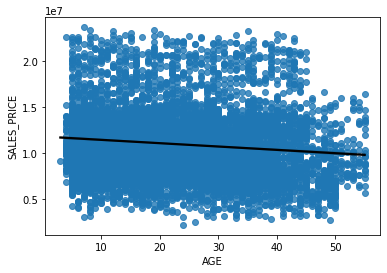

In [45]:
sns.regplot(x='AGE', y='SALES_PRICE',data=df,line_kws={'color':'black'})

### A linear relationshipcan be observed between age of the property and the sales price.


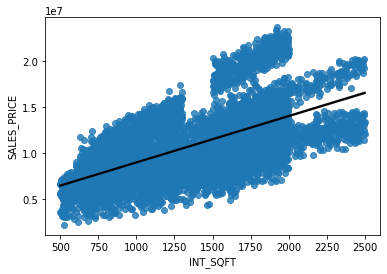

In [46]:
sns.regplot(x='INT_SQFT', y='SALES_PRICE',data=df,line_kws={'color':'black'})

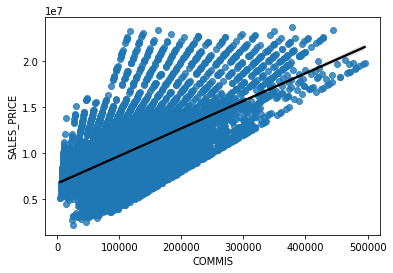

In [47]:
sns.regplot(x='COMMIS', y='SALES_PRICE',data=df,line_kws={'color':'black'})

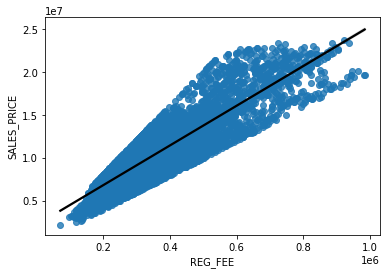

In [48]:
sns.regplot(x='REG_FEE', y='SALES_PRICE',data=df,line_kws={'color':'black'})

##INFERENCE
1. INT_SQFT,N_ROOM,N_BEDROOM,N_BATHROOM,AREA,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE ,COMMIS ,AGE
are deemed important features, that play a significant role in determining the SALES_PRICE.
2. PRT_ID ,DIST_MAINROAD ,SALE_COND ,QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL doesnot affect the SALES_PRICE.Thus these features can be dropped.

In [49]:
 df.drop(['PRT_ID','DIST_MAINROAD','DATE_SALE','SALE_COND','DATE_BUILD','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'],axis=1,inplace=True)

In [50]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,AGE
0,Karapakkam,1004,1,1,3,Yes,Commercial,AllPub,Paved,A,380000,144400,7600000,44
1,Anna Nagar,1986,2,1,5,No,Commercial,AllPub,Gravel,RH,760122,304049,21717770,11
2,Adyar,909,1,1,3,Yes,Commercial,ELO,Gravel,RL,421094,92114,13159200,20
3,Velachery,1855,3,2,5,No,Other,NoSewr,Paved,I,356321,77042,9630290,22
4,Karapakkam,1226,1,1,3,Yes,Other,AllPub,Gravel,C,237000,74063,7406250,30


In [51]:
 df.PARK_FACIL=df.PARK_FACIL.map({'Yes':1,'No':0})

In [52]:
df.AREA=df.AREA.map({'Karapakkam':0,'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6})

In [53]:
 df=pd.get_dummies(df,columns=['BUILDTYPE'])
 df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other
0,0,1004,1,1,3,1,AllPub,Paved,A,380000,144400,7600000,44,1,0,0
1,5,1986,2,1,5,0,AllPub,Gravel,RH,760122,304049,21717770,11,1,0,0
2,1,909,1,1,3,1,ELO,Gravel,RL,421094,92114,13159200,20,1,0,0
3,3,1855,3,2,5,0,NoSewr,Paved,I,356321,77042,9630290,22,0,0,1
4,0,1226,1,1,3,1,AllPub,Gravel,C,237000,74063,7406250,30,0,0,1


In [54]:
 df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other
0,0,1004,1,1,3,1,AllPub,Paved,A,380000,144400,7600000,44,1,0,0
1,5,1986,2,1,5,0,AllPub,Gravel,RH,760122,304049,21717770,11,1,0,0
2,1,909,1,1,3,1,ELO,Gravel,RL,421094,92114,13159200,20,1,0,0
3,3,1855,3,2,5,0,NoSewr,Paved,I,356321,77042,9630290,22,0,0,1
4,0,1226,1,1,3,1,AllPub,Gravel,C,237000,74063,7406250,30,0,0,1


In [55]:
df.UTILITY_AVAIL=df.UTILITY_AVAIL.map({'ELO':0,'NoSewr':1,'AllPub':2})

In [56]:
df.STREET=df.STREET.map({'No Access':0,'Paved':1, 'Gravel':2})

In [57]:
df.MZZONE=df.MZZONE.map({'A':0,'C':1,'I':2,'RH':4, 'RL':5,'RM':6})

In [58]:
df.MZZONE.unique()

array([0, 4, 5, 2, 1, 6])

##Splitting the Data

In [59]:
X = df.drop('SALES_PRICE',axis=1).values
y = df['SALES_PRICE'].values

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)


##Scaling the Data.

In [61]:
scaler = StandardScaler()
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Linear Regression Model.

In [62]:
regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)

LinearRegression()

In [63]:
y_pred_lr = regressor.predict(X_test_scaled)

###Evaluation Metric - R2 value.

In [64]:
print('R2 Score : ', metrics.r2_score(y_test,y_pred_lr))

R2 Score :  0.9338972260752164


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7109 entries, 0 to 7108
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   AREA                  7109 non-null   int64
 1   INT_SQFT              7109 non-null   int64
 2   N_BEDROOM             7109 non-null   int64
 3   N_BATHROOM            7109 non-null   int64
 4   N_ROOM                7109 non-null   int64
 5   PARK_FACIL            7109 non-null   int64
 6   UTILITY_AVAIL         7109 non-null   int64
 7   STREET                7109 non-null   int64
 8   MZZONE                7109 non-null   int64
 9   REG_FEE               7109 non-null   int64
 10  COMMIS                7109 non-null   int64
 11  SALES_PRICE           7109 non-null   int64
 12  AGE                   7109 non-null   int64
 13  BUILDTYPE_Commercial  7109 non-null   uint8
 14  BUILDTYPE_House       7109 non-null   uint8
 15  BUILDTYPE_Other       7109 non-null   uint8
dtypes: int

#KNN Model.

###Finding the K Value.

In [66]:
for i in [1,2,3,4,5,6,7,8,9,10,15,20,50]:
  knn=KNeighborsRegressor(i)
  knn.fit(X_train_scaled,y_train)
  print('K Value : ',i,' score : ',np.mean(cross_val_score(knn,X_train_scaled,y_train,cv=10)))

K Value :  1  score :  0.9238633248787252
K Value :  2  score :  0.9432125911978467
K Value :  3  score :  0.9474945380122805
K Value :  4  score :  0.9501561539496499
K Value :  5  score :  0.9512083695074797
K Value :  6  score :  0.9512100358553631
K Value :  7  score :  0.9501799047126692
K Value :  8  score :  0.9501671026257084
K Value :  9  score :  0.9495349651895454
K Value :  10  score :  0.949021781197222
K Value :  15  score :  0.9454485241165329
K Value :  20  score :  0.9412957968400069
K Value :  50  score :  0.9215285665660403


###Fitting the model.

In [67]:
knn = KNeighborsRegressor(5)
knn.fit(X_train_scaled,y_train)
knn.score(X_test_scaled,y_test)

0.9560016250252227

In [68]:
y_pred_knn = knn.predict(X_test_scaled)


###Evaluation.

In [69]:
print('R2 Score : ',metrics.r2_score(y_test,y_pred_knn))

R2 Score :  0.9560016250252227


#Decision Tree Model.

###Fitting the model.

In [70]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)


###Evaluation.

In [71]:
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_dt))


R2- SCORE: 0.9547169560551805


#Random Forest Model.


###FItting the model.

In [72]:
rf = RandomForestRegressor(n_estimators= 100, max_depth = 15, max_features='sqrt')
rf.fit(X_train, y_train);
y_pred_rf = rf.predict(X_test)

###Evaluation.

In [73]:
print('R2 Score:', metrics.r2_score(y_test,y_pred_rf))

R2 Score: 0.9836053323780841


#XGBoost Model.

In [74]:
for lr in [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(X_train, y_train)
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Test score : ", model.score(X_test,y_test)," Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.3824393259129759  Test score :  -0.35587606140278516  Cross-Val score :  -0.3929751665184948
Learning rate :  0.05  Train score :  0.9617233296396597  Test score :  0.9592748014395198  Cross-Val score :  0.9567620239730255
Learning rate :  0.1  Train score :  0.9791271830528253  Test score :  0.9756352191324659  Cross-Val score :  0.9748367944019973
Learning rate :  0.2  Train score :  0.9893434107925447  Test score :  0.9862882765577754  Cross-Val score :  0.9858568049048795
Learning rate :  0.3  Train score :  0.9927496985036798  Test score :  0.989479452151744  Cross-Val score :  0.98957894822142
Learning rate :  0.4  Train score :  0.9937649867074589  Test score :  0.990941509174789  Cross-Val score :  0.9909937986589779
Learning rate :  0.5  Train score :  0.9949407875610564  Test score :  0.9919646171682666  Cross-Val score :  0.9917277465344083
Learning rate :  0.6  Train score :  0.9949240950671262  Test score :  0.9915234242226164  Cros

###Training the model.

In [75]:
xg = xgb.XGBRegressor(learning_rate = 0.5, n_estimators=100, verbosity = 0)
xg.fit(X_train, y_train)
y_pred_xgb = xg.predict(X_test)


###Evaluation.

In [76]:
print('R2 Score:', metrics.r2_score(y_test,y_pred_xgb))

R2 Score: 0.9919646171682666


#Inference

The accuracy(r2 score) of the results of predicting the house prices in Chennai using multiple machine learning models is as follows.

*   Linear Regression  :  0.935
*   KNN                :  0.954
*   Decision Tree      :  0.961
*   Random Forest      :  0.983
*   XG Boost           :  0.992











# Conclusion

As we have seen, through this Machine Learning Project, we are able to predict the sales price of a house, listed in Chennai with over 99% accuracy.